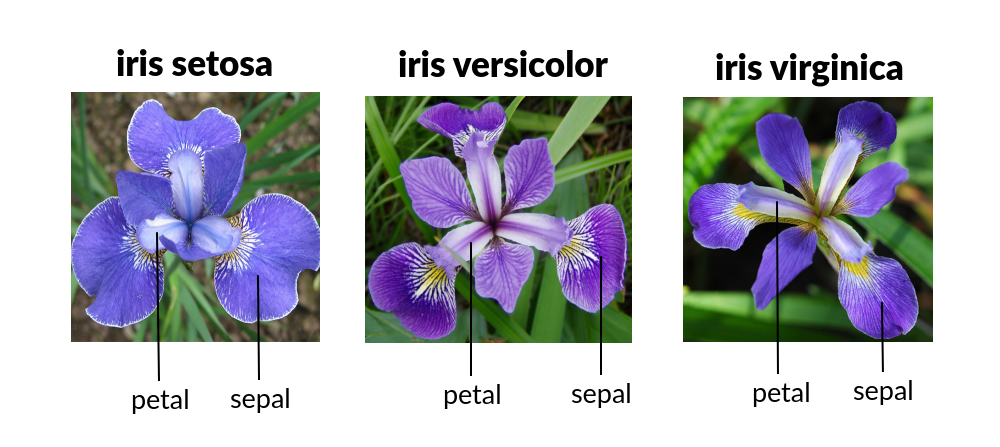

## Import library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Understand Data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Visualize Data

<AxesSubplot:title={'center':'Species'}>

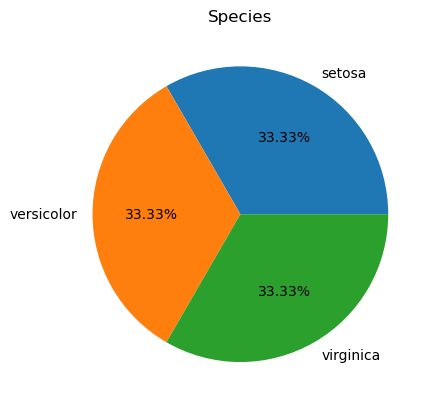

In [6]:
iris['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

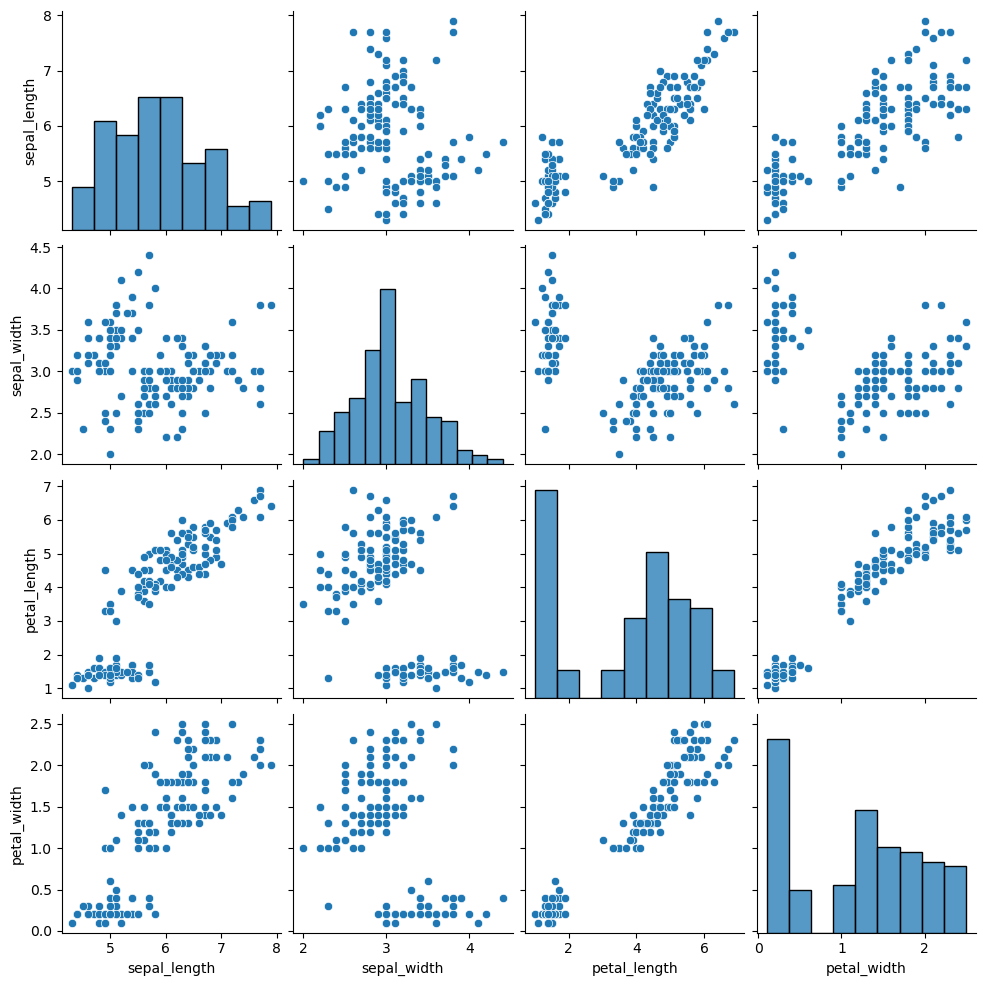

In [7]:
sns.pairplot(iris)

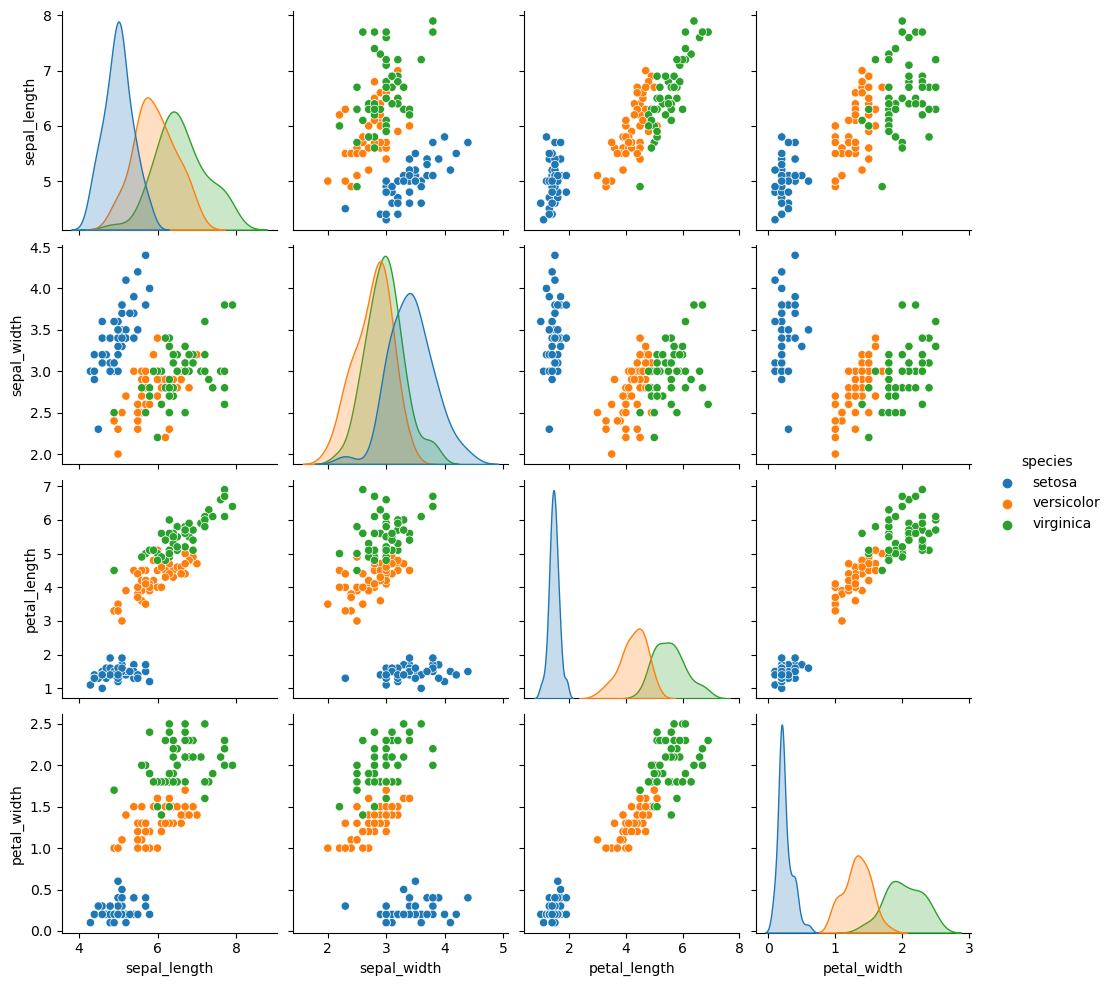

In [8]:
sns.pairplot(iris, hue="species")

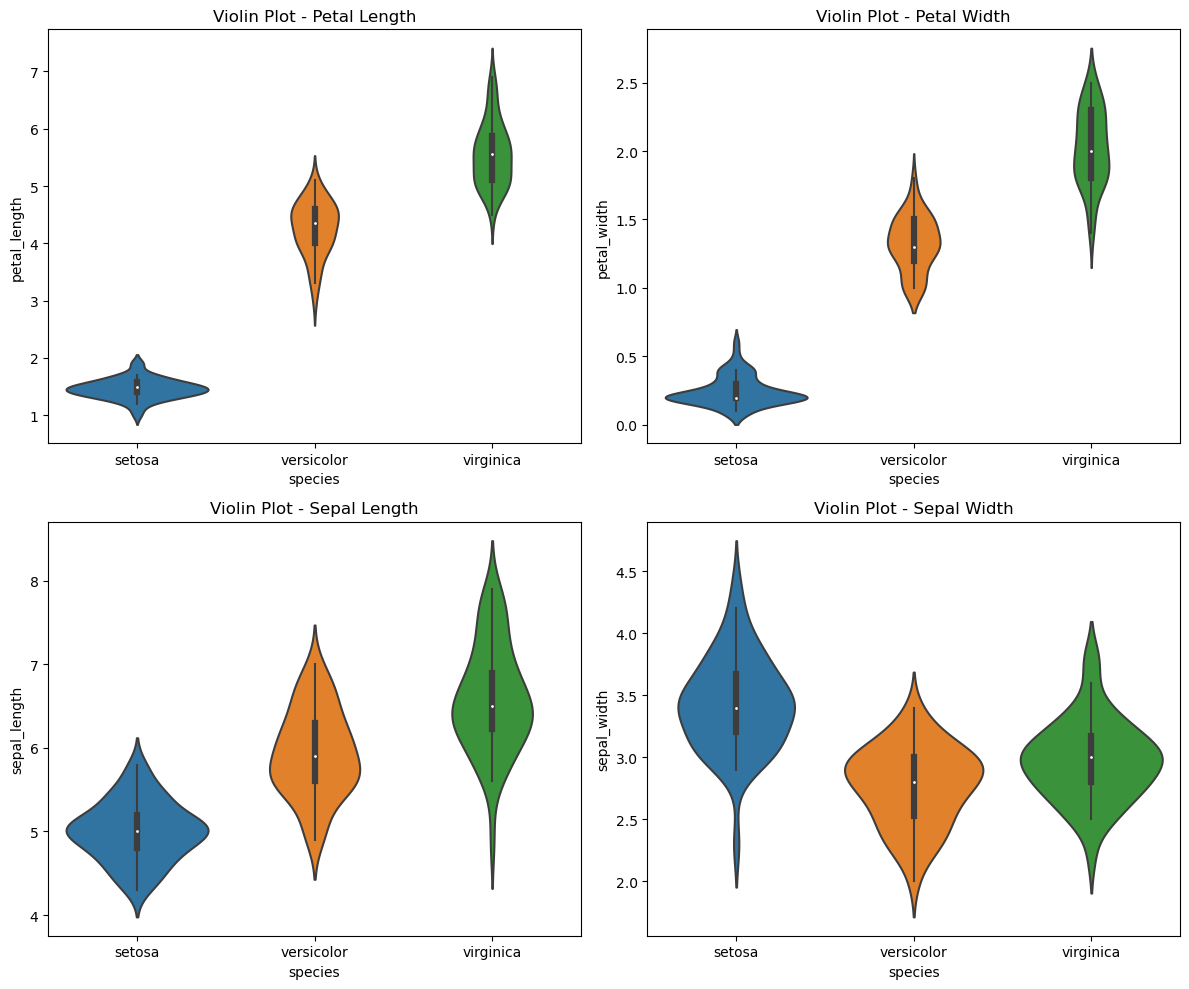

In [9]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# First subplot - violin plot for petal length
sns.violinplot(x="species", y="petal_length", data=iris, size=6, ax=axes[0, 0])
axes[0, 0].set_title("Violin Plot - Petal Length")

# Second subplot - violin plot for petal width
sns.violinplot(x="species", y="petal_width", data=iris, size=6, ax=axes[0, 1])
axes[0, 1].set_title("Violin Plot - Petal Width")

# Third subplot - violin plot for sepal length
sns.violinplot(x="species", y="sepal_length", data=iris, size=6, ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot - Sepal Length")

# Fourth subplot - violin plot for sepal width
sns.violinplot(x="species", y="sepal_width", data=iris, size=6, ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot - Sepal Width")

# Adjust layout
plt.tight_layout()
plt.show()

## ML Model

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
iris["species"] = encoder.fit_transform(iris["species"])

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
y = iris["species"]
X = iris.drop("species", axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [18]:
# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

